In [29]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
class FeatureGen(BaseEstimator, TransformerMixin):
    
    features = {'ABS (антиблокировочная система)',
         'AUX/iPod',
         'Bluetooth',
         'CD/MP3 проигрыватель',
         'ESP (система поддержания динамической стабильности)',
         'USB',
         'Автозапуск двигателя',
         'Антипробуксовочная система',
         'Датчик дождя',
         'Иммобилайзер',
         'Камера заднего вида',
         'Климат-контроль',
         'Кондиционер',
         'Контроль мертвых зон на зеркалах',
         'Круиз-контроль',
         'Ксеноновые фары',
         'Легкосплавные диски',
         'Люк',
         'Материал салона',
         'Мультимедийный экран',
         'Обогрев зеркал',
         'Обогрев лобового стекла',
         'Обогрев руля',
         'Обогрев сидений',
         'Панорамная крыша',
         'Парктроники',
         'Подушки безопасности боковые',
         'Подушки безопасности задние',
         'Подушки безопасности передние',
         'Противотуманные фары',
         'Рейлинги на крыше',
         'Светодиодные фары',
         'Сигнализация',
         'Управление мультимедиа с руля',
         'Фаркоп',
         'Цвет салона - темный',
         'Штатная навигация',
         'Электрорегулировка сидений',
         'Электростеклоподъемники задние',
         'Электростеклоподъемники передние'}
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.features]
            

In [ ]:
avto = pd.read_csv('data/full_vis.csv', sep=';').iloc[:, 1:]
ft = FeatureGenerator()

In [37]:
table = pd.DataFrame(np.zeros((len(FeatureGenerator.features), 2)), 
                     index=FeatureGenerator.features, columns=['difference', 'percent'])

for imp in FeatureGenerator.features:
    a = avto.groupby(by=imp)['Цена'].median()
    b = avto[imp].value_counts()
    if 1 in a.index and 0 in a.index:
        table.loc[imp, 'difference'] = a[1] - a[0]
        table.loc[imp, 'percent'] = b[1] / (b.sum())
        
table = table.sort_values(by='difference')

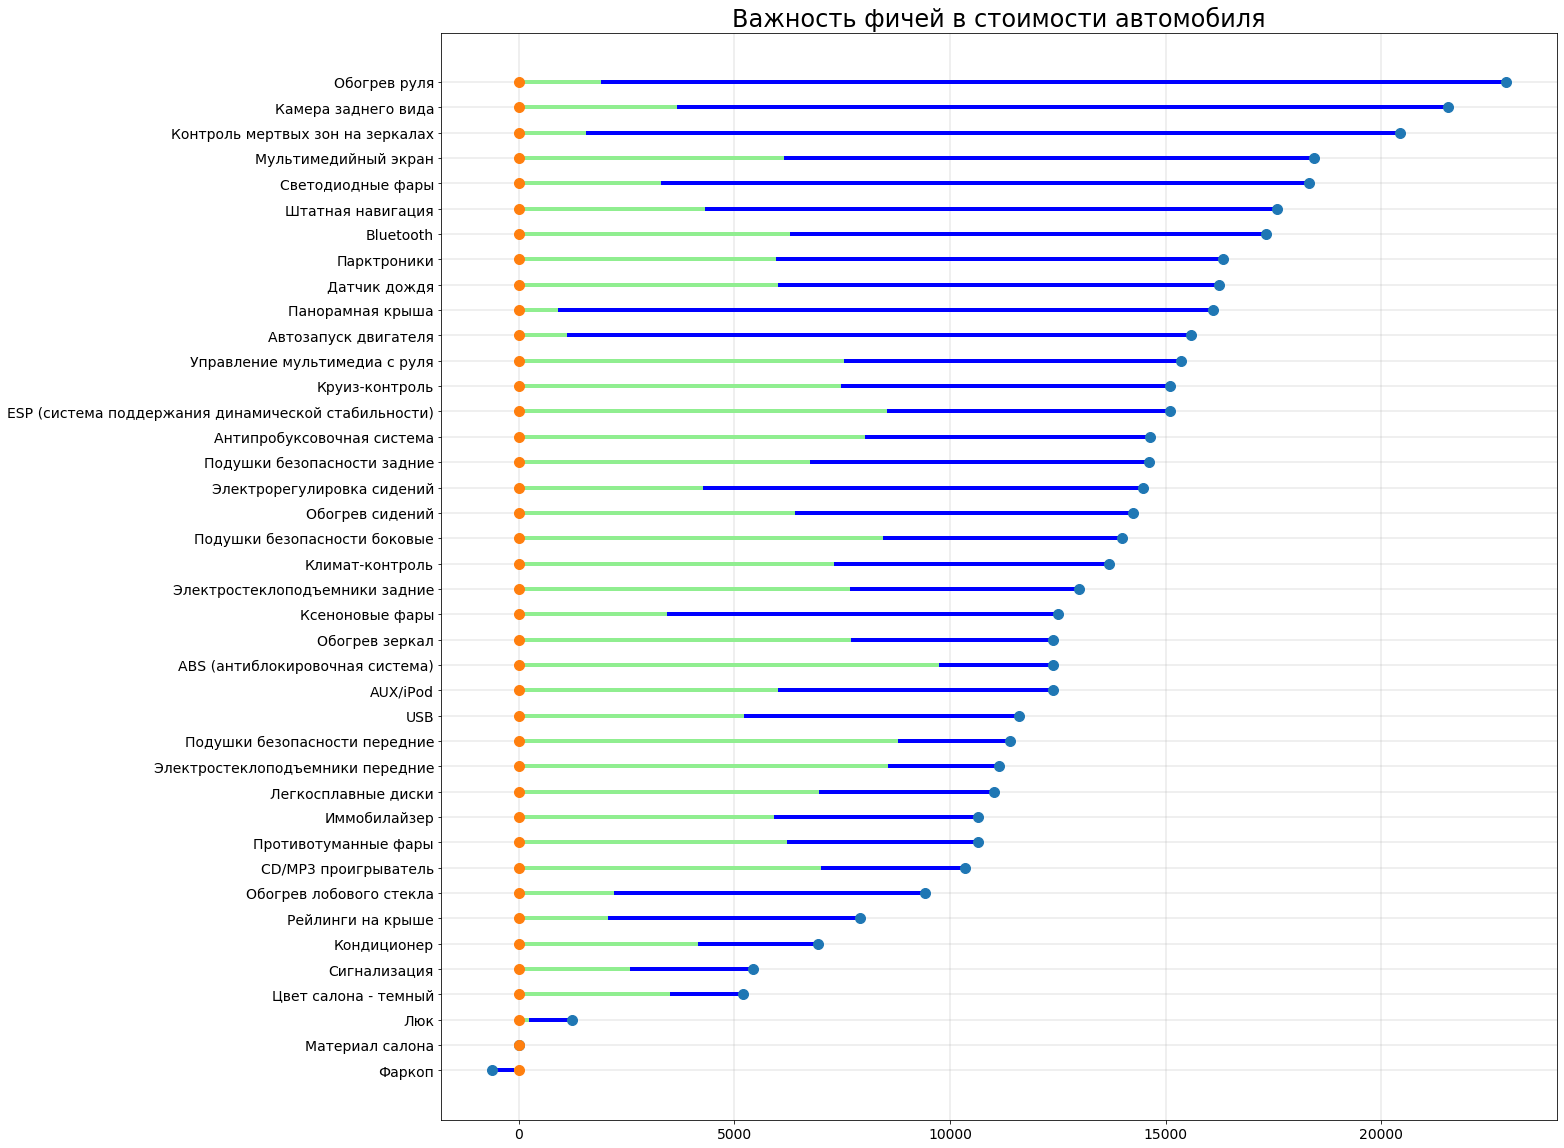

In [45]:
plt.figure(figsize=(20, 20))
plt.hlines(y=table.index, xmin=0, xmax=table['difference'], color='blue', linewidth=4)
plt.hlines(y=table.index, xmin=0, xmax=table['difference']*table['percent'], color='lightgreen', linewidth=4)
plt.plot(table, table.index, 'o', markersize=10)

plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(linewidth=0.4)
plt.title('Важность фичей в стоимости автомобиля', size=24)
plt.show()